<a href="https://colab.research.google.com/github/LAFernandez-2024info/proyecto-integrado-2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: arme un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Artes", "Música", "Informática"
]

# Función para generar nombres y apellidos aleatorios
def generar_nombre_apellido():
  nombres = ["Juan", "María", "Pedro", "Ana", "Luis", "Laura", "Carlos", "Sofía", "Diego", "Valentina"]
  apellidos = ["Gómez", "Rodríguez", "Pérez", "López", "García", "Martínez", "Fernández", "González", "Díaz", "Sánchez"]
  return random.choice(nombres), random.choice(apellidos)

# Generar datos aleatorios para el DataFrame
data = []
for i in range(100):
  nombre, apellido = generar_nombre_apellido()
  dni = np.random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota_1er_trimestre = np.random.randint(1, 11)
  nota_2do_trimestre = np.random.randint(1, 11)
  nota_3er_trimestre = np.random.randint(1, 11)
  faltas = np.random.randint(0, 15)

  data.append([nombre, apellido, dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])


# Crear el DataFrame
df = pd.DataFrame(data, columns=["Nombre", "Apellido", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

# Mostrar las primeras filas del DataFrame
print(df.head())

   Nombre   Apellido   Nro_DNI   Materia Escolar  Nota 1er Trimestre  \
0   María  Rodríguez  56816644  Educación Física                   6   
1    Luis      López  32352486            Música                   5   
2  Carlos  Rodríguez  82183810             Artes                   7   
3   Laura      López  72545975        Matemática                  10   
4   María     García  39595654            Música                   6   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a clases  
0                   7                   1                3  
1                   8                   4                7  
2                   8                   1               14  
3                   1                   5               10  
4                  10                   1                2  


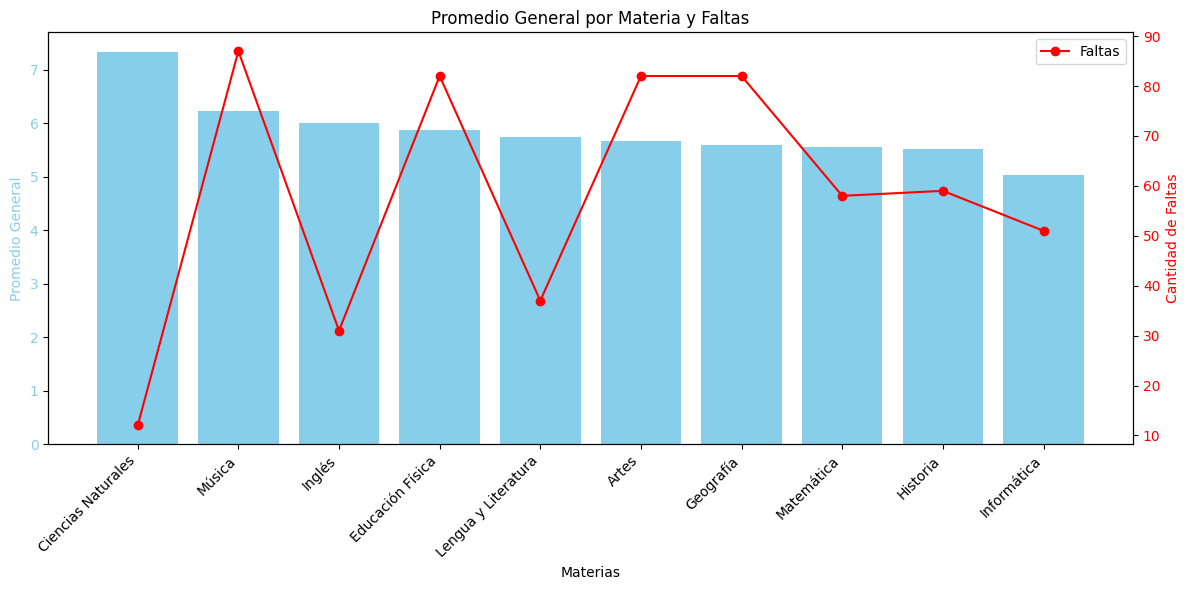

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio general de cada materia
promedio_materias = df.groupby('Materia Escolar').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean', 'Faltas a clases': 'sum'})
promedio_materias['Promedio General'] = (promedio_materias['Nota 1er Trimestre'] + promedio_materias['Nota 2do Trimestre'] + promedio_materias['Nota 3er Trimestre']) / 3

# Ordenar las materias por promedio general de mayor a menor
promedio_materias = promedio_materias.sort_values('Promedio General', ascending=False)

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(promedio_materias.index, promedio_materias['Promedio General'], color='skyblue')
ax1.set_xlabel('Materias')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General por Materia y Faltas')
plt.xticks(rotation=45, ha='right')

# Agregar las faltas como un segundo eje
ax2 = ax1.twinx()
ax2.plot(promedio_materias.index, promedio_materias['Faltas a clases'], color='red', marker='o')
ax2.set_ylabel('Cantidad de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar leyendas
plt.legend(['Faltas'], loc='upper right')

plt.tight_layout()
plt.show()